In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset, DataLoader
import cv2
import os
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import os

from utils import *
from PATH import *
from data import *
from train import *
from models import *

from torchinfo import summary

In [2]:
dataset = KITTI_DEP(KITTI_TRAIN_RGB_PATHS, KITTI_TRAIN_LABEL_PATHS, original=True)

shape torch.Size([1, 352, 1216])
unique2 [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 58 62 63 64 65 68 69 70 71 72 73 74 75 76]
unique2 [0 1 2 3 4 5 6 7 8 9]
data torch.Size([3, 150, 480]) torch.Size([1, 150, 480]) (352, 1216, 3) (352, 1216)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


unique [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 58 62 63 64 65 68 69 70 71 72 73 74 75 76]
unique [0 1 2 3 4 5 6 7 8 9]


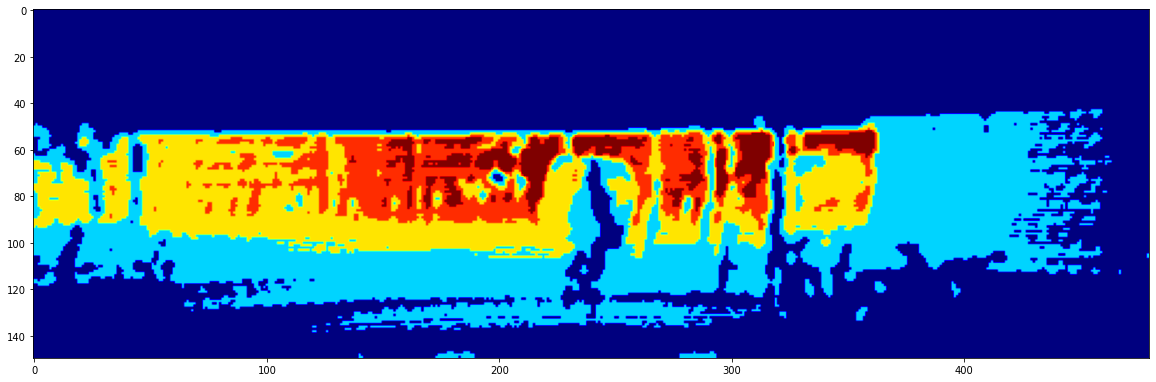

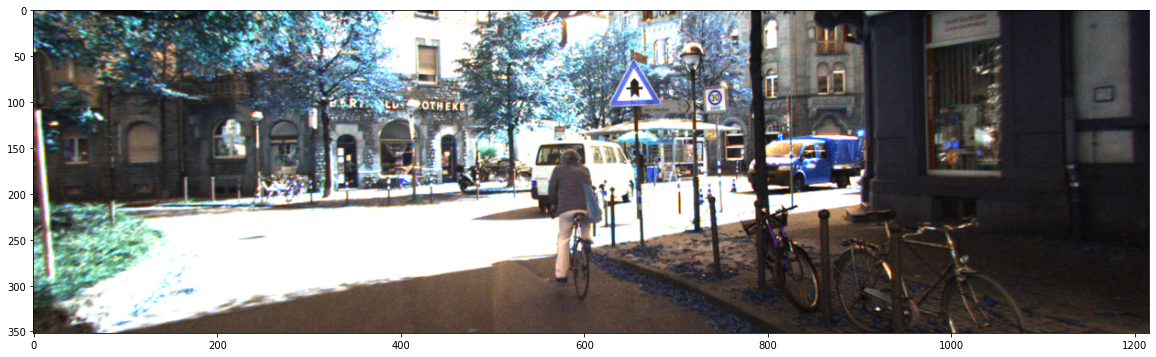

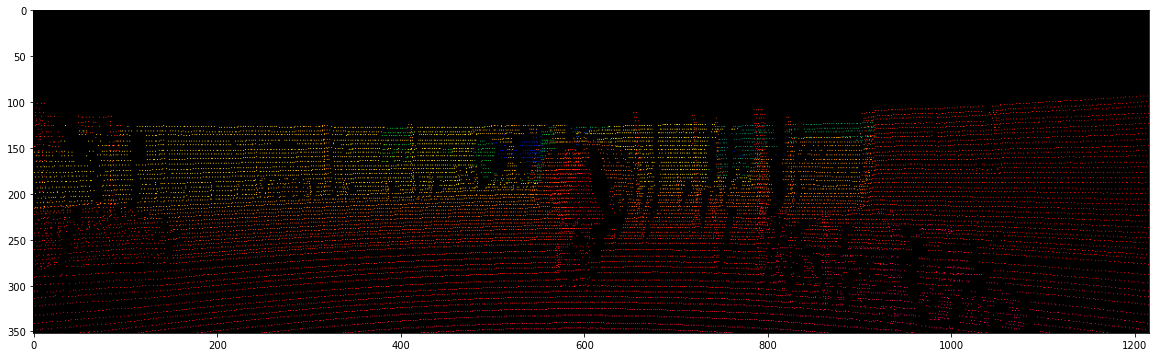

In [3]:
dataset.example(37)

unique 3 [0.0000000e+00 1.0938095e-03 1.5571571e-03 ... 1.7405609e+02 1.8042430e+02
 1.8415533e+02] (768, 1024)
unique 3 [0.0000000e+00 2.6120411e-03 3.1867961e-03 ... 1.2679031e+02 1.4187059e+02
 1.6137088e+02] torch.Size([1, 320, 320])
data torch.Size([3, 320, 320]) torch.Size([1, 320, 320]) (768, 1024, 3) (768, 1024)


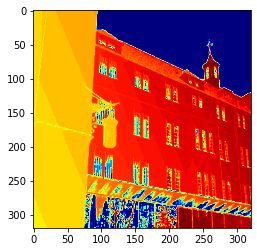

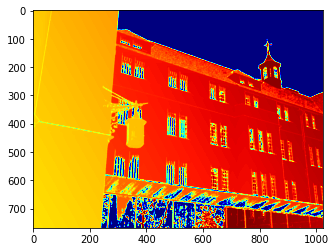

In [4]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize( (320, 320) ),     
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
target_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Resize( (320, 320) )])

dataset = DIODE(TRAIN_PATHS, transform=preprocess, target_transform=target_transform, original=True)
dataset.example()